# K-means Clustering Algorithm Step-by-Step

K-means clustering is an iterative algorithm that partitions a dataset into a specified number of clusters. Each cluster is represented by its center, and data points are assigned to the nearest cluster center. The algorithm aims to minimize the sum of squared distances between data points and their respective cluster centers.

### Step 1: Initialize Cluster Centers

1. Choose the desired number of clusters, K.
2. Initialize K cluster centers randomly. These can be selected from the dataset or generated randomly.

### Step 2: Assign Data Points to Nearest Cluster

1. For each data point in the dataset:
   - Calculate the distance between the data point and each cluster center.
   - Assign the data point to the cluster with the nearest center.

### Step 3: Update Cluster Centers

1. For each cluster, compute the mean of all data points assigned to that cluster.
2. Update the cluster center to the computed mean.

### Step 4: Convergence Check

1. Calculate the difference between the old and new cluster centers.
2. If the difference is below a predefined threshold (tolerance) or a maximum number of iterations is reached, stop the algorithm. Otherwise, go back to Step 2.

### Step 5: Output Results

1. The algorithm terminates when convergence is achieved or the maximum number of iterations is reached.
2. The final cluster centers represent the centers of the identified clusters.
3. Each data point is assigned to the cluster with the nearest center.

### Conclusion

K-means clustering is a simple yet effective algorithm for partitioning data into clusters. It is widely used in various applications such as image segmentation, customer segmentation, and data compression. It is important to note that K-means may converge to a local minimum, and the algorithm's performance can be influenced by the initial cluster centers. Therefore, it is common practice to run the algorithm multiple times with different initializations and choose the best result based on a defined criterion.


In [44]:
import random
import numpy as np

class KMeanCluster():
    def __init__(self, n_clusters, max_iterations=20000, tol=0.0):
        # Initialize KMeansCluster with the number of clusters, maximum iterations, and tolerance
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = len(X), len(X[0])

        # Initialize cluster centroids randomly from data points
        random_indices = random.sample(range(n_samples), self.n_clusters)
        self.cluster_centers = [X[i] for i in random_indices]

        # Main loop for K-means algorithm
        assigned_clusters = []
        for _ in range(self.max_iterations):
            assigned_clusters = []

            # Assign each data point to the nearest cluster
            for x in X:
                assigned_clusters.append(self._assign_cluster(x))

            new_centers = []
            for cluster_index in range(self.n_clusters):
                # Get all points in the current cluster
                points_in_current_cluster = [X[i] for i in range(n_samples) if assigned_clusters[i] == cluster_index]
                new_centers.append(self._compute_mean(points_in_current_cluster))

            # Check for convergence
            if self._is_converged(self.cluster_centers, new_centers):
                break

            self.cluster_centers = new_centers

        self.labels_ = assigned_clusters
        return self

    def _assign_cluster(self, x):
        min_dist = float('inf')
        min_cluster = None

        # Find the nearest cluster for a data point
        for cluster_index in range(self.n_clusters):
            dist = self._distance(x, self.cluster_centers[cluster_index])
            if dist < min_dist:
                min_dist = dist
                min_cluster = cluster_index
        return min_cluster

    def _distance(self, x, y):
        # Calculate Euclidean distance between two points
        return np.linalg.norm(np.array(x) - np.array(y))

    def _compute_mean(self, points):
        # Calculate mean of a list of points
        return np.mean(points, axis=0)

    def _is_converged(self, center1, center2):
        # Check if the centers have converged based on tolerance
        for c1, c2 in zip(center1, center2):
            dist = self._distance(c1, c2)
            if dist > self.tol:
                return False
        return True

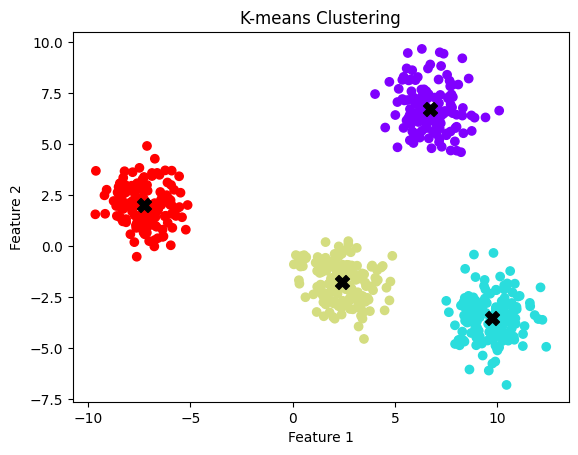

In [45]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data using make_blobs
n_samples = 600
n_features = 2
n_clusters = 4
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters)

# Apply K-means clustering using your KMeanCluster class
kmeans = KMeanCluster(n_clusters=n_clusters)
kmeans.fit(X)

# Plot the clustered data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(np.array(kmeans.cluster_centers)[:, 0], np.array(kmeans.cluster_centers)[:, 1], marker='X', s=100, color='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()